Modelo guardado como 'modelo_pitagoras.keras'


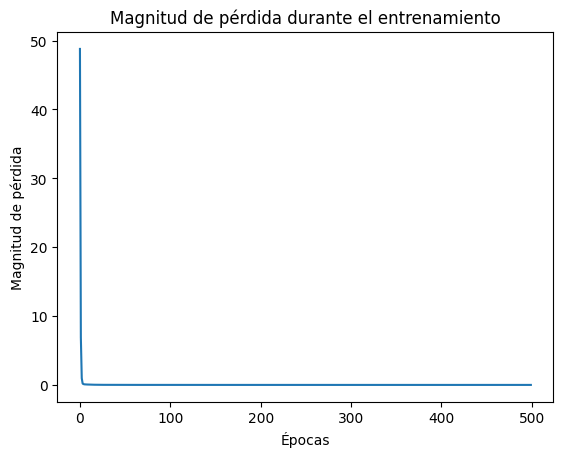

In [1]:
import tensorflow as tf
import numpy as np
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Generamos datos de entrenamiento para el Teorema de Pitágoras
a_values = np.random.uniform(1, 10, 500)
b_values = np.random.uniform(1, 10, 500)
c_values = np.sqrt(a_values**2 + b_values**2)  # Hipotenusa calculada

X = np.column_stack((a_values, b_values))  # Catetos 'a' y 'b' como entradas
y = c_values  # Hipotenusa 'c' como salida

# Definimos el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=8, activation='relu', name='hidden_layer1'),
    tf.keras.layers.Dense(units=8, activation='relu', name='hidden_layer2'),
    tf.keras.layers.Dense(units=1, name='output_layer')
])

# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Configuramos TensorBoard
log_dir = "logs/pitagoras/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)

# Entrenamos el modelo
history = model.fit(X, y, epochs=500, verbose=0, callbacks=[tensorboard_callback])

# Guardar el modelo en formato .keras
model.save('modelo_pitagoras.keras', save_format='keras')
print("Modelo guardado como 'modelo_pitagoras.keras'")

# Graficamos la magnitud de pérdida
plt.plot(history.history['loss'])
plt.xlabel('Épocas')
plt.ylabel('Magnitud de pérdida')
plt.title('Magnitud de pérdida durante el entrenamiento')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


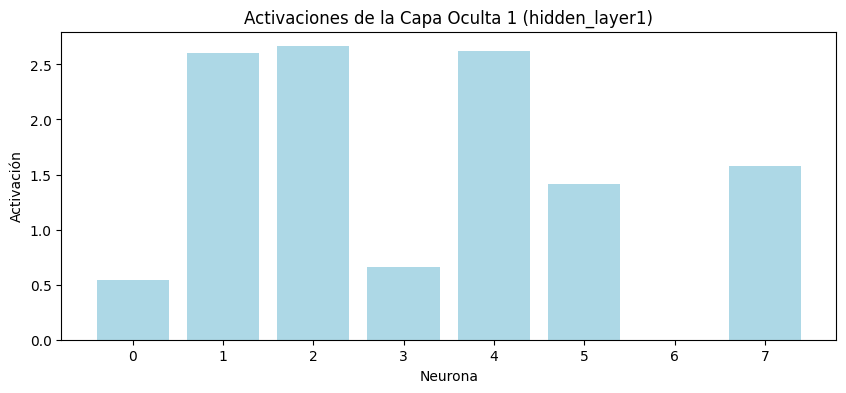

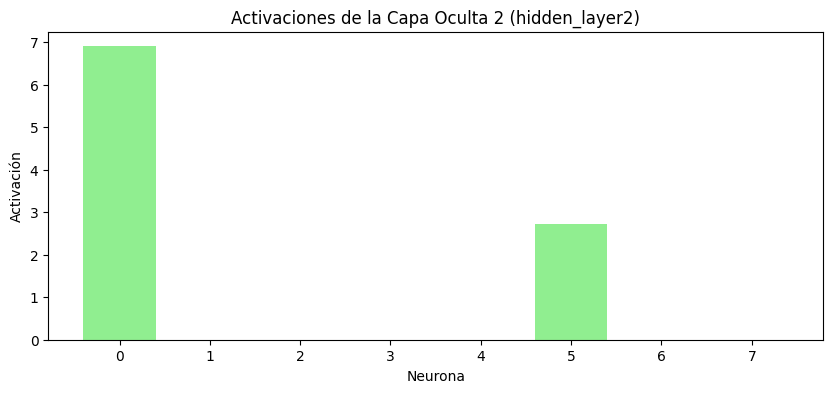

In [2]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input

# Cargar el modelo guardado en formato .keras
model = load_model('modelo_pitagoras.keras')

# Función para obtener activaciones de una capa específica
def get_layer_activation(model, layer_name, input_data):
    # Creamos una nueva entrada explícita para el modelo intermedio
    input_layer = Input(shape=(2,))
    # Pasamos las activaciones desde la entrada hasta la capa deseada
    x = input_layer
    for layer in model.layers:
        x = layer(x)
        if layer.name == layer_name:
            break
    intermediate_layer_model = tf.keras.Model(inputs=input_layer, outputs=x)
    # Obtenemos las activaciones
    activation = intermediate_layer_model.predict(input_data)
    return activation

# Definimos un ejemplo para obtener las activaciones
input_data = np.array([[3.0, 4.0]])

# Obtener activaciones
activation_hidden1 = get_layer_activation(model, 'hidden_layer1', input_data)
activation_hidden2 = get_layer_activation(model, 'hidden_layer2', input_data)

# Visualización de las activaciones de la primera capa oculta
plt.figure(figsize=(10, 4))
plt.bar(range(activation_hidden1.shape[1]), activation_hidden1[0], color='lightblue')
plt.xlabel('Neurona')
plt.ylabel('Activación')
plt.title('Activaciones de la Capa Oculta 1 (hidden_layer1)')
plt.show()

# Visualización de las activaciones de la segunda capa oculta
plt.figure(figsize=(10, 4))
plt.bar(range(activation_hidden2.shape[1]), activation_hidden2[0], color='lightgreen')
plt.xlabel('Neurona')
plt.ylabel('Activación')
plt.title('Activaciones de la Capa Oculta 2 (hidden_layer2)')
plt.show()


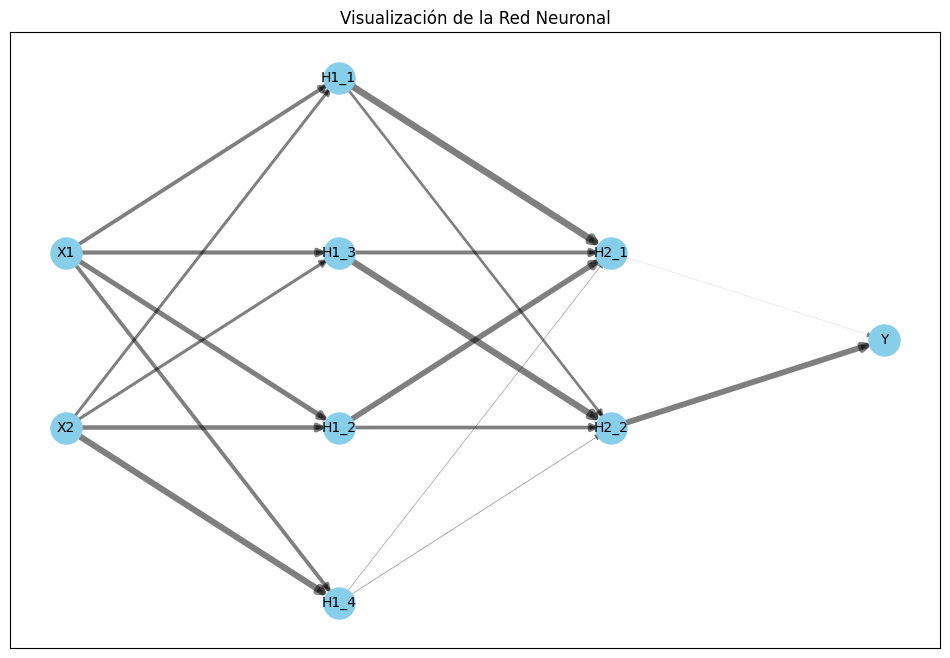

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Definir la estructura de la red
num_inputs = 2
hidden_layers = [4, 2]  # Dos capas ocultas con 4 y 2 neuronas respectivamente
num_outputs = 1

# Crear el grafo de la red neuronal
G = nx.DiGraph()

# Añadir nodos para la capa de entrada
for i in range(num_inputs):
    G.add_node(f"X{i+1}", layer=0)

# Añadir nodos para las capas ocultas
for layer_idx, num_neurons in enumerate(hidden_layers):
    for n in range(num_neurons):
        G.add_node(f"H{layer_idx+1}_{n+1}", layer=layer_idx+1)

# Añadir nodo de salida
G.add_node("Y", layer=len(hidden_layers) + 1)

# Añadir conexiones (pesos simulados aleatoriamente)
np.random.seed(0)
for i in range(num_inputs):
    for j in range(hidden_layers[0]):
        weight = np.random.rand()
        G.add_edge(f"X{i+1}", f"H1_{j+1}", weight=weight)

for layer_idx in range(1, len(hidden_layers)):
    for i in range(hidden_layers[layer_idx - 1]):
        for j in range(hidden_layers[layer_idx]):
            weight = np.random.rand()
            G.add_edge(f"H{layer_idx}_{i+1}", f"H{layer_idx+1}_{j+1}", weight=weight)

for i in range(hidden_layers[-1]):
    weight = np.random.rand()
    G.add_edge(f"H{len(hidden_layers)}_{i+1}", "Y", weight=weight)

# Dibujar la red con colores y grosores según los pesos
pos = nx.multipartite_layout(G, subset_key="layer")
plt.figure(figsize=(12, 8))

# Dibujar nodos y etiquetas
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Dibujar conexiones con grosores que representan los pesos
edges = G.edges(data=True)
for u, v, d in edges:
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=5 * d['weight'], alpha=0.5)

plt.title("Visualización de la Red Neuronal")
plt.show()
